In [1]:
import cv2
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(268, 173, 3)

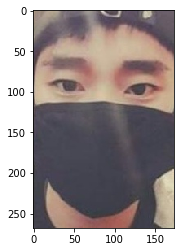

In [2]:
img_array=cv2.imread("sample_data/sample1.jpg")
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
img_array.shape

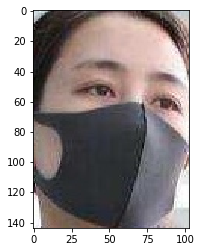

In [3]:
img1=cv2.imread("sample_data/sample1.jpg")
img1.shape
data="sample_data/"
classes=["with_mask","without_mask"]
for i in classes:
  path=os.path.join(data,i)
  for img in os.listdir(path):
    img_arr=cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

In [4]:
train=[]
def training():
  for i in classes:
    path=os.path.join(data,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        new_arr=cv2.resize(img_arr,(224,224))
        train.append([new_arr,class_num])
      except Exception as e:
        pass
training()

In [5]:
print(len(train))

416


In [6]:
import random
random.shuffle(train)

In [7]:
x=[]
y=[]
for i,j in train:
  x.append(i)
  y.append(j)
x=np.array(x).reshape(-1,224,224,3)
x.shape
x=x/255
y=np.array(y)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model=keras.applications.mobilenet.MobileNet()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [9]:
base_input=model.layers[0].input
base_output=model.layers[-4].output
flat=layers.Flatten()(base_output)
final=layers.Dense(1)(flat)
output=layers.Activation('sigmoid')(final)
new_model=keras.Model(inputs=base_input,outputs=output)
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [10]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [11]:
new_model.fit(x,y,epochs=1,validation_split=0.1)

Train on 374 samples, validate on 42 samples
Epoch 1/1
374/374 [==============================] - 1945s 5s/step - loss: 0.1115 - acc: 0.9412 - val_loss: 0.8277 - val_acc: 0.7857


In [16]:
#import pickle
#with open('model_pickle','wb') as f:
    #pickle.dump(new_model,f)
#setattr(tf.contrib.rnn.GRUCell, '__deepcopy__', lambda self, _: self)
#setattr(tf.contrib.rnn.BasicLSTMCell, '__deepcopy__', lambda self, _: self)
#setattr(tf.contrib.rnn.MultiRNNCell, '__deepcopy__', lambda self, _: self)
#from sklearn.externals import joblib
#joblib.dump(model,'model_joblib')
new_model.save('saved_model')

In [19]:
#new_model.save_weights('./my_checkpoint')


In [34]:

#sec_model = tf.keras.models.load_model('saved_model')
#sec_model= tf.keras.models.load_model("saved_model",
 #                 custom_objects = {"weibull_loglik_discrete": weibull_loglik_discrete,"activate":activate})

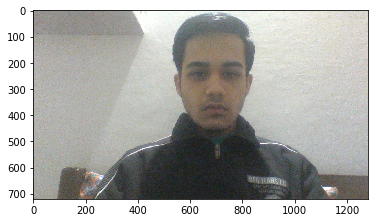

In [68]:
img_arr=cv2.imread('sample_data/WIN_20201201_083340.jpg')
plt.imshow(cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB))

In [69]:
final=cv2.resize(img_arr,(224,224))
final=np.expand_dims(final,axis=0)
final=final/255

[[0.62859267]]
Not wearing mask


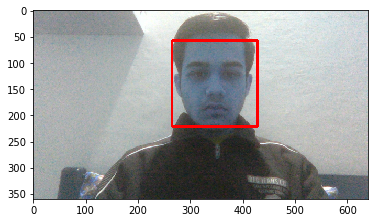

In [71]:
ans=new_model.predict(final)
face_cas=cv2.CascadeClassifier("sample_data/haar.xml")
print(ans)
gray=cv2.cvtColor(img_arr,cv2.COLOR_BGR2GRAY)
frame = cv2.resize(img_arr, None, fx=0.5, fy=0.5)
fr=face_cas.detectMultiScale(frame,scaleFactor=1.05,minNeighbors=5)
for x,y,h,w in fr:
    if ans < 0.6:
      image=cv2.rectangle(frame,(x,y),(x+h,y+w),(0,255,0),3)
      plt.imshow(image)
    else:
      image=cv2.rectangle(frame,(x,y),(x+h,y+w),(255,0,0),3)
      plt.imshow(image)

if ans  < 0.6:
  print("Wearing mask")
else :
  print("Not wearing mask")